<a href="https://colab.research.google.com/github/MariaDanielaVelasco/LE2_Velasco_MD/blob/main/LE2_Velasco_MD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mounting Drive**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Libraries**

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# **Loading Dataset**
## **Rice (Cammeo and Osmancik)**
Features are Area, Perimeter, Major Axis Length, Minor Axis Length, Eccentricity, Convex Area, and Extent

Target variable is Class: Type of rice (Cammeo and Osmancik rices)

In [6]:
rice = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Datasets/Rice_Cammeo_Osmancik.csv'))

# **Data Exploration**

In [7]:
# Display the first few rows of the DataFrame
rice.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [8]:
# Check the information
rice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.2+ KB


In [9]:
# Check for null/mising values
print("Null/Missing Values: ")
print(rice.isnull().sum())

# Check for duplication
print("\nDuplicate Values: ")
print(rice.duplicated().sum())

# Check the shape
print("\nShape: ")
print(rice.shape)

Null/Missing Values: 
Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

Duplicate Values: 
0

Shape: 
(3810, 8)


In [10]:
# Display summary statistics
print("Summary statistics:")
print(rice.describe())

Summary statistics:
               Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count   3810.000000  3810.000000        3810.000000        3810.000000   
mean   12667.727559   454.239180         188.776222          86.313750   
std     1732.367706    35.597081          17.448679           5.729817   
min     7551.000000   359.100006         145.264465          59.532406   
25%    11370.500000   426.144752         174.353855          82.731695   
50%    12421.500000   448.852493         185.810059          86.434647   
75%    13950.000000   483.683746         203.550438          90.143677   
max    18913.000000   548.445984         239.010498         107.542450   

       Eccentricity   Convex_Area       Extent  
count   3810.000000   3810.000000  3810.000000  
mean       0.886871  12952.496850     0.661934  
std        0.020818   1776.972042     0.077239  
min        0.777233   7723.000000     0.497413  
25%        0.872402  11626.250000     0.598862  
50%        0.889050

# **Visualizing the Data**

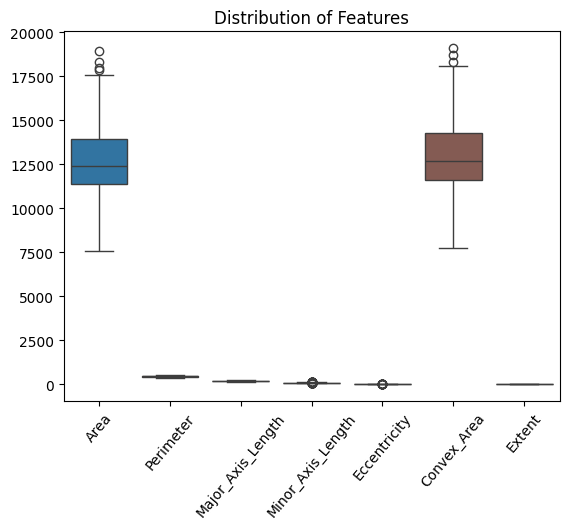

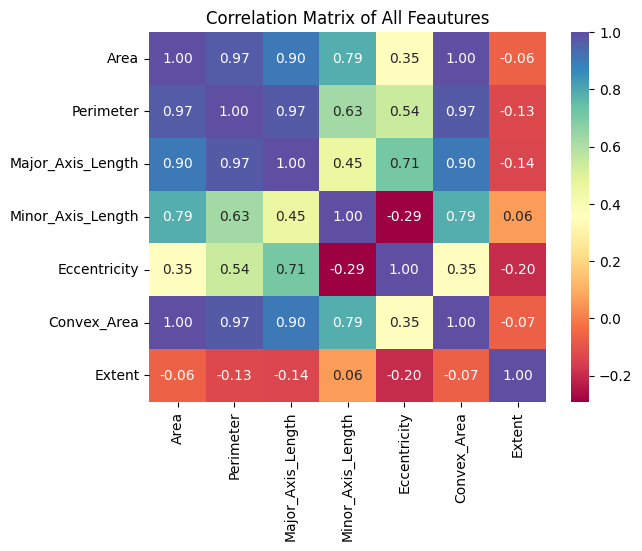

In [11]:
# Visualizing the features
sns.boxplot(data = rice.drop("Class", axis = 1))
plt.title("Distribution of Features")
plt.xticks(rotation = 50)
plt.show()

# Plot correlation heatmap for selected features
rice_selected = rice.drop("Class", axis = 1)
sns.heatmap(rice_selected.corr(), annot = True, cmap = "Spectral", fmt = ".2f")
plt.title("Correlation Matrix of All Feautures")
plt.show()

# **Model Selection**

In [12]:
class_models = {
    "Logistic Regression": LogisticRegression(max_iter = 10000, random_state = 42),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors = 3),
    "Support Vector Machine": SVC(kernel = "rbf", random_state = 42),
    "Decision Tree": DecisionTreeClassifier(random_state = 42),
    "Random Forest": RandomForestClassifier(random_state = 42)
}

# **Model Training and Evaluation**

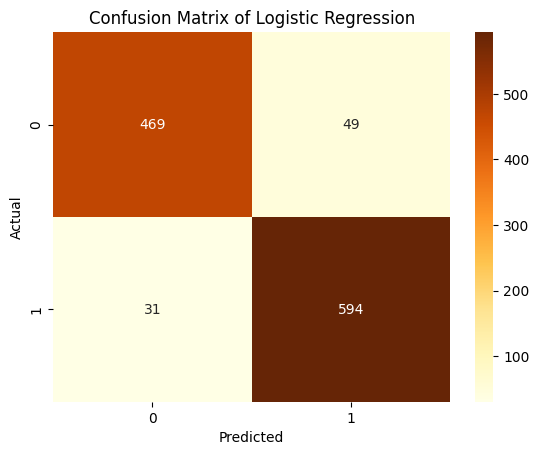

Logistic Regression Accuracy: 93.00%
Logistic Regression Classification Report:
              precision    recall  f1-score   support

      Cammeo       0.94      0.91      0.92       518
    Osmancik       0.92      0.95      0.94       625

    accuracy                           0.93      1143
   macro avg       0.93      0.93      0.93      1143
weighted avg       0.93      0.93      0.93      1143



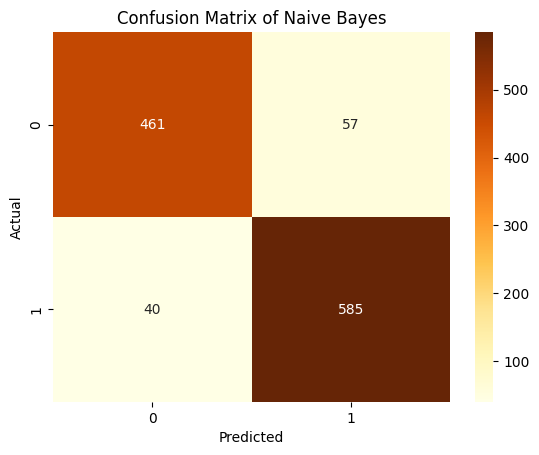

Naive Bayes Accuracy: 91.51%
Naive Bayes Classification Report:
              precision    recall  f1-score   support

      Cammeo       0.92      0.89      0.90       518
    Osmancik       0.91      0.94      0.92       625

    accuracy                           0.92      1143
   macro avg       0.92      0.91      0.91      1143
weighted avg       0.92      0.92      0.91      1143



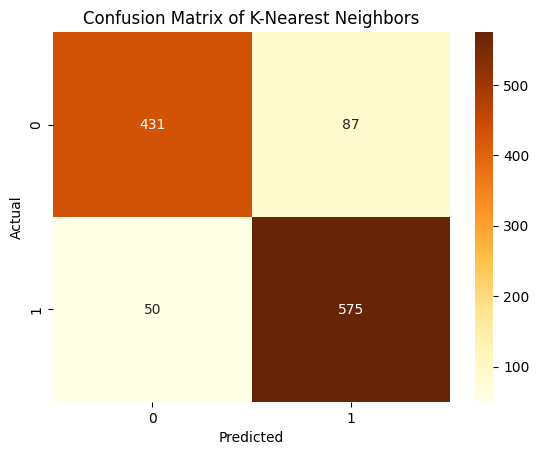

K-Nearest Neighbors Accuracy: 88.01%
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

      Cammeo       0.90      0.83      0.86       518
    Osmancik       0.87      0.92      0.89       625

    accuracy                           0.88      1143
   macro avg       0.88      0.88      0.88      1143
weighted avg       0.88      0.88      0.88      1143



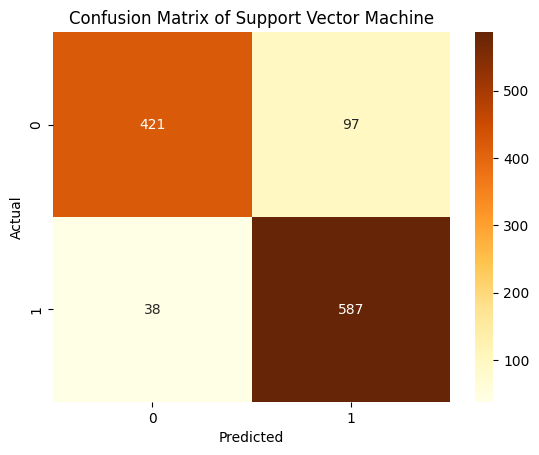

Support Vector Machine Accuracy: 88.19%
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

      Cammeo       0.92      0.81      0.86       518
    Osmancik       0.86      0.94      0.90       625

    accuracy                           0.88      1143
   macro avg       0.89      0.88      0.88      1143
weighted avg       0.88      0.88      0.88      1143



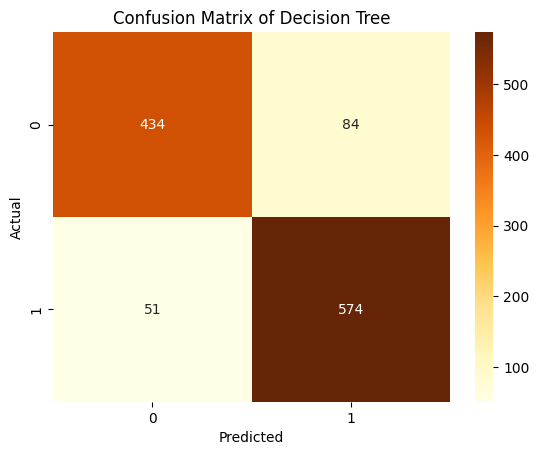

Decision Tree Accuracy: 88.19%
Decision Tree Classification Report:
              precision    recall  f1-score   support

      Cammeo       0.89      0.84      0.87       518
    Osmancik       0.87      0.92      0.89       625

    accuracy                           0.88      1143
   macro avg       0.88      0.88      0.88      1143
weighted avg       0.88      0.88      0.88      1143



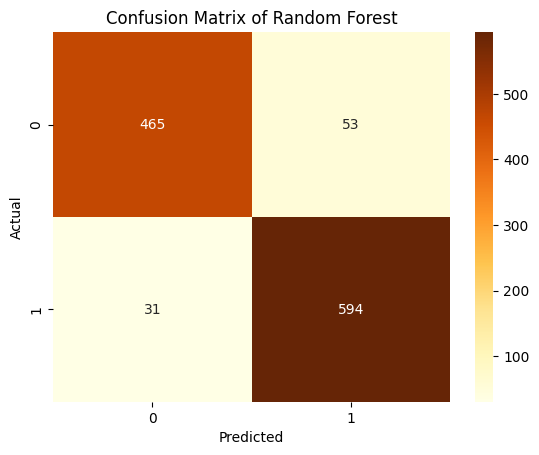

Random Forest Accuracy: 92.65%
Random Forest Classification Report:
              precision    recall  f1-score   support

      Cammeo       0.94      0.90      0.92       518
    Osmancik       0.92      0.95      0.93       625

    accuracy                           0.93      1143
   macro avg       0.93      0.92      0.93      1143
weighted avg       0.93      0.93      0.93      1143



In [13]:
# Separate the data into features (X) and target variable (y)
X = rice.drop("Class", axis = 1)  # Features
y = rice["Class"]  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#Confusion Matrix
def c_matrix(cmat, title):
    sns.heatmap(cmat, annot = True, fmt = "d", cmap = "YlOrBr")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix of {title}")
    plt.show()

# Train and evaluate models
results = {}
acc = {}
for classifiers, model in class_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cmat = confusion_matrix(y_test, y_pred)
    c_matrix(cmat, classifiers)
    class_report = classification_report(y_test, y_pred)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred, average = 'weighted') * 100
    recall = recall_score(y_test, y_pred, average = 'weighted') * 100
    f1 = f1_score(y_test, y_pred, average = 'weighted') * 100

    # Store results
    results[classifiers] = {
      'Accuracy': accuracy,
      'Precision': precision,
      'Recall': recall,
      'F1-score': f1
    }

    acc[classifiers] = accuracy

    print(f"{classifiers} Accuracy: {accuracy:.2f}%")
    print(f"{classifiers} Classification Report:\n{class_report}")

In [14]:
# Summarry of classfication models evaluation results:
classifiers = pd.DataFrame(results.values(), index = results.keys())
print("\nClassification Models Evaluation Results: ")
print(classifiers.to_string(float_format = "{:.2f}%".format))


Classification Models Evaluation Results: 
                        Accuracy  Precision  Recall  F1-score
Logistic Regression       93.00%     93.02%  93.00%    92.99%
Naive Bayes               91.51%     91.53%  91.51%    91.50%
K-Nearest Neighbors       88.01%     88.10%  88.01%    87.96%
Support Vector Machine    88.19%     88.49%  88.19%    88.10%
Decision Tree             88.19%     88.25%  88.19%    88.15%
Random Forest             92.65%     92.69%  92.65%    92.63%


# **Model Selection for Best Performing Model**

In [15]:
# Finding the best performing model
best_model_name = max(acc, key = acc.get)
best_model = class_models[best_model_name]
print("Best Model:", best_model)
print("Metrics:")
for metric, value in results[best_model_name].items():
    print(f"\t{metric}: {value:.2f}%")

Best Model: LogisticRegression(max_iter=10000, random_state=42)
Metrics:
	Accuracy: 93.00%
	Precision: 93.02%
	Recall: 93.00%
	F1-score: 92.99%


# **Ensembling**

In [16]:
# Train and evaluate the highest performing model with all features
model_orig = best_model.fit(X_train, y_train)
pred_highest = best_model.predict(X_test)

acc_highest = accuracy_score(y_test, pred_highest) * 100
precision_highest = precision_score(y_test, pred_highest, average = 'weighted') * 100
recall_highest = recall_score(y_test, pred_highest, average = 'weighted') * 100
f1_highest = f1_score(y_test, pred_highest, average = 'weighted') * 100

# Stacking Classifier
stacking_model = StackingClassifier(estimators=[('best_model', best_model)], final_estimator = RandomForestClassifier(random_state = 42))
stacking_model.fit(X_train, y_train)
pred_stacking = stacking_model.predict(X_test)

acc_stacking = stacking_model.score(X_test, y_test) * 100
precision_stacking = precision_score(y_test, pred_stacking, average = 'weighted') * 100
recall_stacking = recall_score(y_test, pred_stacking, average = 'weighted') * 100
f1_stacking = f1_score(y_test, pred_stacking, average = 'weighted') * 100

# AdaBoost Classifier
adaboost_model = AdaBoostClassifier(estimator=best_model, n_estimators = 100)
adaboost_model.fit(X_train, y_train)
pred_adaboost = adaboost_model.predict(X_test)

acc_adaboost = adaboost_model.score(X_test, y_test) * 100
precision_adaboost = precision_score(y_test, pred_adaboost, average = 'weighted') * 100
recall_adaboost = recall_score(y_test, pred_adaboost, average = 'weighted') * 100
f1_adaboost = f1_score(y_test, pred_adaboost, average = 'weighted') * 100

# Bagging Classifier
bagging_model = BaggingClassifier(estimator=best_model, n_estimators = 100)
bagging_model.fit(X_train, y_train)
pred_bagging = bagging_model.predict(X_test)

acc_bagging = bagging_model.score(X_test, y_test) * 100
precision_bagging = precision_score(y_test, pred_bagging, average='weighted') * 100
recall_bagging = recall_score(y_test, pred_bagging, average='weighted') * 100
f1_bagging = f1_score(y_test, pred_bagging, average='weighted') * 100

ensemble_models = {
    "Original": {
        "Accuracy": acc_highest,
        "Precision": precision_highest,
        "Recall": recall_highest,
        "F1-score": f1_highest
    },
    "Stacking": {
        "Accuracy": acc_stacking,
        "Precision": precision_stacking,
        "Recall": recall_stacking,
        "F1-score": f1_stacking
    },
    "AdaBoost": {
        "Accuracy": acc_adaboost,
        "Precision": precision_adaboost,
        "Recall": recall_adaboost,
        "F1-score": f1_adaboost
    },
    "Bagging": {
        "Accuracy": acc_bagging,
        "Precision": precision_bagging,
        "Recall": recall_bagging,
        "F1-score": f1_bagging
    }
}

acc_models = {
    "Original": acc_highest,
    "Stacking": acc_stacking,
    "AdaBoost": acc_adaboost,
    "Bagging": acc_bagging
}

print("Summary of Model Accuracies:")
for model, accuracy in acc_models.items():
    print(f"{model}: {accuracy:.2f}%")
for model_name, model_metrics in ensemble_models.items():
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred))


Summary of Model Accuracies:
Original: 93.00%
Stacking: 88.36%
AdaBoost: 93.26%
Bagging: 93.09%

Classification Report for Original:
              precision    recall  f1-score   support

      Cammeo       0.94      0.90      0.92       518
    Osmancik       0.92      0.95      0.93       625

    accuracy                           0.93      1143
   macro avg       0.93      0.92      0.93      1143
weighted avg       0.93      0.93      0.93      1143


Classification Report for Stacking:
              precision    recall  f1-score   support

      Cammeo       0.94      0.90      0.92       518
    Osmancik       0.92      0.95      0.93       625

    accuracy                           0.93      1143
   macro avg       0.93      0.92      0.93      1143
weighted avg       0.93      0.93      0.93      1143


Classification Report for AdaBoost:
              precision    recall  f1-score   support

      Cammeo       0.94      0.90      0.92       518
    Osmancik       0.92      0

In [17]:
# Summary of models metrics before and after ensemble techniques
classifiers = pd.DataFrame(ensemble_models.values(), index = ensemble_models.keys())
print("\nModel Metrics Comparison Before and After Ensemble Techniques:")
print(classifiers.to_string(float_format="{:.2f}%".format))


Model Metrics Comparison Before and After Ensemble Techniques:
          Accuracy  Precision  Recall  F1-score
Original    93.00%     93.02%  93.00%    92.99%
Stacking    88.36%     88.38%  88.36%    88.34%
AdaBoost    93.26%     93.28%  93.26%    93.25%
Bagging     93.09%     93.11%  93.09%    93.08%


# **Data Visualization for Classification Models and Ensemble Models**

In [31]:
class_models = list(results.keys())
accuracy = [results[classifiers]["Accuracy"] for classifiers in class_models]
precision = [results[classifiers]["Precision"] for classifiers in class_models]
recall = [results[classifiers]["Recall"] for classifiers in class_models]
f1_score = [results[classifiers]["F1-score"] for classifiers in class_models]

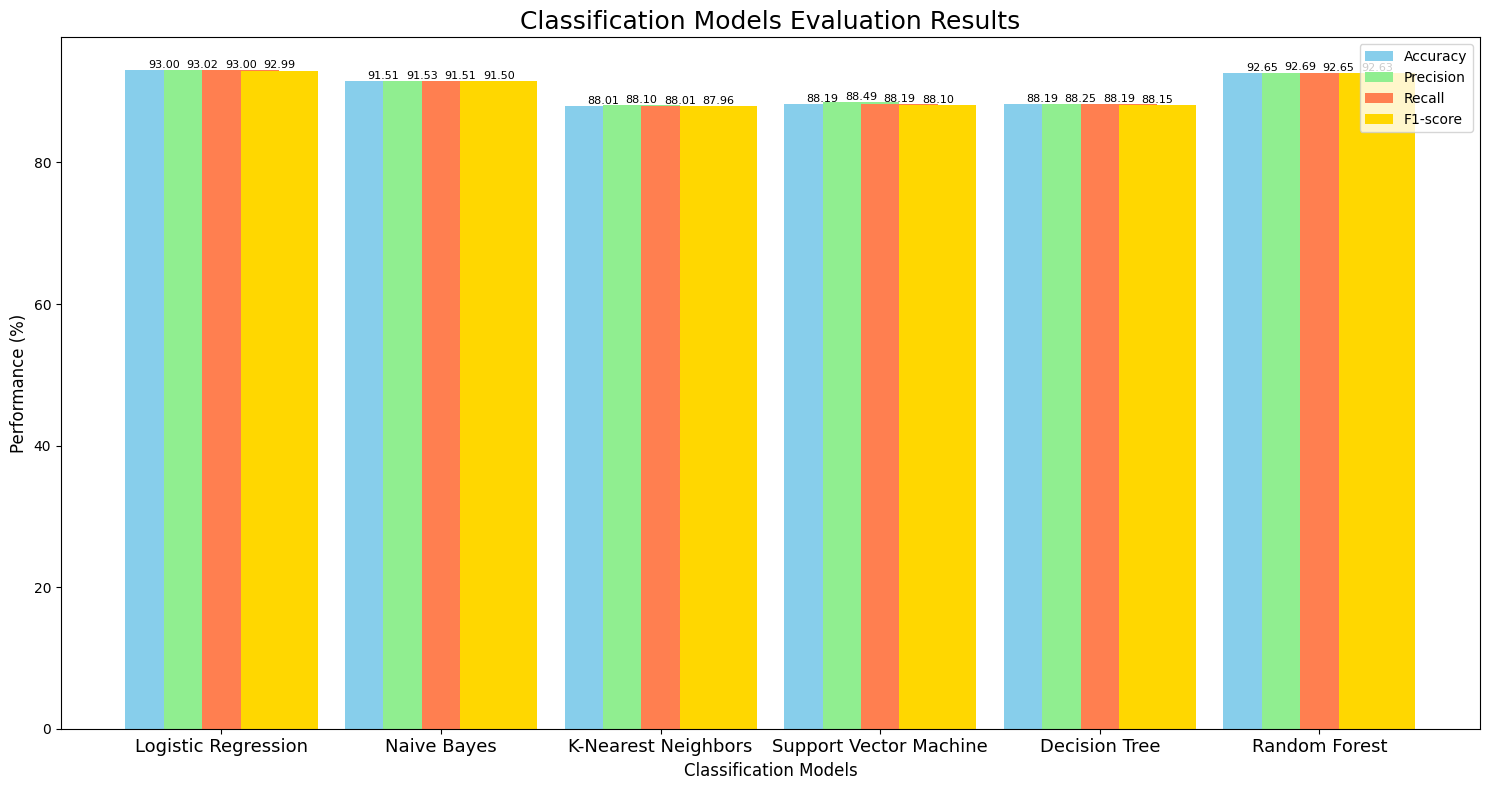


Classification Models Evaluation Results: 
          Accuracy  Precision  Recall  F1-score
Original    93.00%     93.02%  93.00%    92.99%
Stacking    88.36%     88.38%  88.36%    88.34%
AdaBoost    93.26%     93.28%  93.26%    93.25%
Bagging     93.09%     93.11%  93.09%    93.08%


In [41]:
# Creating bar plot of classification models evaluation metrics
plt.figure(figsize = (15, 8))
bar_wid = 0.35

index = np.arange(len(class_models))
bar_accuracy = plt.bar(index - 1.5 * bar_wid / 2, accuracy, bar_wid, label = 'Accuracy', color = 'skyblue')
bar_precision = plt.bar(index - 0.5 * bar_wid / 2, precision, bar_wid, label = 'Precision', color = 'lightgreen')
bar_recall = plt.bar(index + 0.5 * bar_wid / 2, recall, bar_wid, label = 'Recall', color = 'coral')
bar_f1_score = plt.bar(index + 1.5 * bar_wid / 2, f1_score, bar_wid, label = 'F1-score', color = 'gold')

for bar in bar_accuracy:
  y_val = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, y_val + 0.02, f"{y_val:.2f}", ha = 'center', va = 'bottom', fontsize = 8)
for bar in bar_precision:
  y_val = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, y_val + 0.02, f"{y_val:.2f}", ha = 'center', va = 'bottom', fontsize = 8)
for bar in bar_recall:
  y_val = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, y_val + 0.02, f"{y_val:.2f}", ha = 'center', va = 'bottom', fontsize = 8)
for bar in bar_f1_score:
  y_val = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, y_val + 0.02, f"{y_val:.2f}", ha = 'center', va = 'bottom', fontsize = 8)

plt.xticks(index, class_models, fontsize = 13)
plt.xlabel("Classification Models", fontsize = 12)
plt.ylabel("Performance (%)", fontsize = 12)
plt.title("Classification Models Evaluation Results", fontsize = 18)
plt.legend()

plt.tight_layout()
plt.show()

print("\nClassification Models Evaluation Results: ")
print(classifiers.to_string(float_format = "{:.2f}%".format))

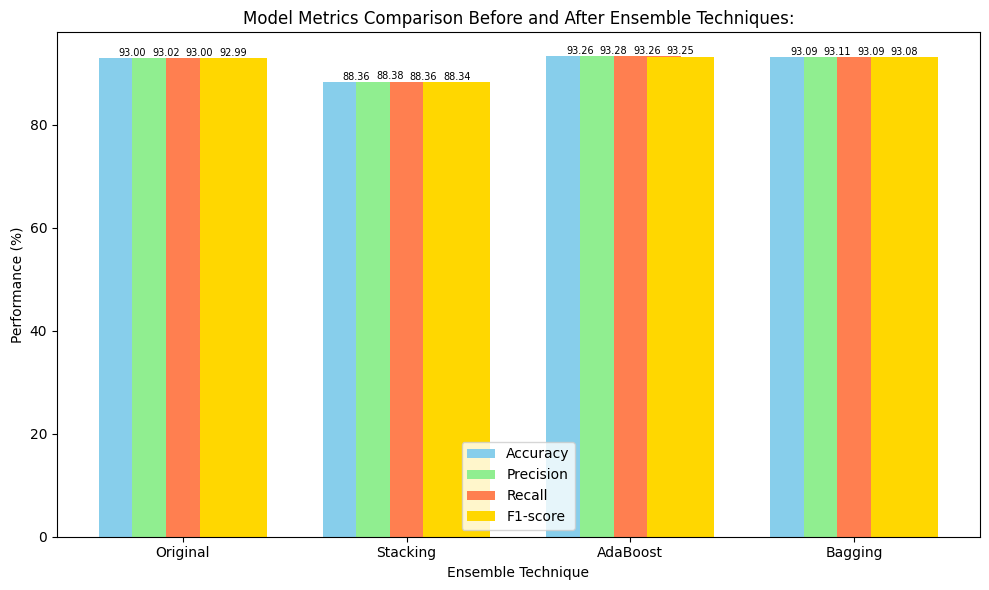


Model Metrics Comparison Before and After Ensemble Techniques:
          Accuracy  Precision  Recall  F1-score
Original    93.00%     93.02%  93.00%    92.99%
Stacking    88.36%     88.38%  88.36%    88.34%
AdaBoost    93.26%     93.28%  93.26%    93.25%
Bagging     93.09%     93.11%  93.09%    93.08%


In [42]:
# Creating bar plot for orig and ensemble models evaluation metrics
classifiers = pd.DataFrame(ensemble_models.values(), index = ensemble_models.keys())

plt.figure(figsize = (10, 6))
bar_width = 0.3

index = np.arange(len(classifiers.columns))
bar_acc = plt.bar(index - 1.5 * bar_width / 2, classifiers['Accuracy'], bar_width, label = 'Accuracy', color = 'skyblue')
bar_pre = plt.bar(index - 0.5 * bar_width / 2, classifiers['Precision'], bar_width, label = 'Precision', color = 'lightgreen')
bar_rc = plt.bar(index + 0.5 * bar_width / 2, classifiers['Recall'], bar_width, label = 'Recall', color = 'coral')
bar_f1 = plt.bar(index + 1.5 * bar_width / 2, classifiers['F1-score'], bar_width, label = 'F1-score', color = 'gold')

for bar in bar_acc:
  y_value = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, y_value + 0.02, f"{y_value:.2f}", ha = 'center', va = 'bottom', fontsize = 7)
for bar in bar_pre:
  y_value = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, y_value + 0.02, f"{y_value:.2f}", ha = 'center', va = 'bottom', fontsize = 7)
for bar in bar_rc:
  y_value = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, y_value + 0.02, f"{y_value:.2f}", ha = 'center', va = 'bottom', fontsize = 7)
for bar in bar_f1:
  y_value = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, y_value + 0.02, f"{y_value:.2f}", ha = 'center', va = 'bottom', fontsize = 7)

plt.xticks(index, ['Original', 'Stacking', 'AdaBoost', 'Bagging'])
plt.xlabel("Ensemble Technique")
plt.ylabel("Performance (%)")
plt.title("Model Metrics Comparison Before and After Ensemble Techniques:")
plt.legend()

plt.tight_layout()
plt.show()

print("\nModel Metrics Comparison Before and After Ensemble Techniques:")
print(classifiers.to_string(float_format="{:.2f}%".format))